In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('/Users/manabendrasandilya/Desktop/Github/Repository/Untitled/Datasets/Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [4]:
df.dropna(axis=0,inplace=True)
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0,295.00


In [5]:
df.isna().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [6]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          1158
Carpet  Area              52
Plot  Area               269
Super built-up  Area    6017
Name: area_type, dtype: int64

In [7]:
df=df.drop(['area_type','availability','society','balcony'],axis='columns')
df.shape

(7496, 5)

In [8]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
5,Whitefield,2 BHK,1170,2.0,38.00
11,Whitefield,4 Bedroom,2785,5.0,295.00


In [9]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 RK', '4 BHK',
       '1 BHK', '5 BHK', '11 BHK', '5 Bedroom', '9 BHK', '2 Bedroom',
       '6 BHK', '7 BHK', '6 Bedroom'], dtype=object)

In [10]:
df['bhk']=df['size'].apply(lambda x: int(x.split(' ')[0]))

In [11]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
5,Whitefield,2 BHK,1170,2.0,38.00,2
11,Whitefield,4 Bedroom,2785,5.0,295.00,4


In [12]:
df['bhk'].unique()

array([ 2,  4,  3,  1,  5, 11,  9,  6,  7])

In [13]:
 df[df.bhk>7]

,location,size,total_sqft,bath,price,bhk
459,1 Giri Nagar,11 BHK,5000,9.0,360.0,11
538,Mico Layout,9 BHK,5000,9.0,210.0,9


In [14]:
df.total_sqft.unique()

array(['1056', '2600', '1521', ..., '1919', '2111', '4689'], dtype=object)

In [15]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
df[~df.total_sqft.apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4
772,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,59.935,2
850,Bannerghatta Road,2 BHK,1115 - 1130,2.0,58.935,2


In [17]:
def convert_to_sqft(x):
    token=x.split('-')
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [18]:
convert_to_sqft('34.46Sq.Meter')

In [19]:
convert_to_sqft('2145')

2145.0

In [20]:
convert_to_sqft('2100-2850')

2475.0

In [22]:
df1=df.copy()
df1.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
5,Whitefield,2 BHK,1170,2.0,38.00,2
11,Whitefield,4 Bedroom,2785,5.0,295.00,4


In [24]:
df1['total_sqft']=df1['total_sqft'].apply(convert_to_sqft)
df1

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
11,Whitefield,4 Bedroom,2785.0,5.0,295.00,4
...,...,...,...,...,...,...
13313,Uttarahalli,3 BHK,1345.0,2.0,57.00,3
13314,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2


In [28]:
df1.dropna()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
11,Whitefield,4 Bedroom,2785.0,5.0,295.00,4
...,...,...,...,...,...,...
13313,Uttarahalli,3 BHK,1345.0,2.0,57.00,3
13314,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2


In [30]:
df1.isnull().sum()

location       0
size           0
total_sqft    15
bath           0
price          0
bhk            0
dtype: int64

In [33]:
df1['price_per_sqft']=df1['price']*100000/df1['total_sqft']
df1.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
11,Whitefield,4 Bedroom,2785.0,5.0,295.00,4,10592.459605


In [34]:
df1.isnull().sum()

location           0
size               0
total_sqft        15
bath               0
price              0
bhk                0
price_per_sqft    15
dtype: int64

In [35]:
df1.dropna(inplace=True)

In [36]:
df1.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [39]:
len(df1.location.unique())

633

In [40]:
df2=df1.copy()

In [47]:
df2.location=df2.location.apply(lambda x:x.strip())
location_stats=df2.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield                        397
Sarjapur  Road                    310
Electronic City                   238
Kanakpura Road                    216
Thanisandra                       214
                                 ... 
Kothannur                           1
Kuvempu Layout                      1
Kuvempu Nagar                       1
Lakshmi Layout                      1
Yeshwanthpur Industrial Suburb      1
Name: location, Length: 625, dtype: int64

In [49]:
len(location_stats[location_stats<=10])

482

In [50]:
location_less_than_10=location_stats[location_stats<=10]
location_less_than_10

location
Prithvi Layout                    10
Vidyaranyapura                    10
Banashankari Stage III            10
Arekere                           10
Rayasandra                        10
                                  ..
Kothannur                          1
Kuvempu Layout                     1
Kuvempu Nagar                      1
Lakshmi Layout                     1
Yeshwanthpur Industrial Suburb     1
Name: location, Length: 482, dtype: int64

In [51]:
df2.location=df2.location.apply(lambda x: 'other' if x in location_less_than_10 else x)
len(df2.location.unique())

144

In [52]:
 df2[df2['total_sqft']/df2['bhk']<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
349,other,3 Bedroom,11.0,3.0,74.0,3,672727.272727
480,other,4 BHK,1150.0,4.0,260.0,4,22608.695652
483,other,5 Bedroom,1200.0,5.0,190.0,5,15833.333333
1239,Electronic City,2 BHK,550.0,1.0,16.0,2,2909.090909
2040,Electronic City,2 BHK,550.0,1.0,15.0,2,2727.272727


In [53]:
df2.shape

(7481, 7)

In [54]:
df3=df2[~(df2['total_sqft']/df2['bhk']<300)]
df3.shape

(7439, 7)

In [55]:
df3.price_per_sqft.describe()

count     7439.000000
mean      5851.020195
std       2705.465697
min        371.428571
25%       4283.397683
50%       5319.284802
75%       6693.881632
max      76530.612245
Name: price_per_sqft, dtype: float64

# Remove Outliers

In [61]:
def remove_outliers(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df4=remove_outliers(df3)
df4.shape
        

(5862, 7)

In [70]:
from matplotlib import pyplot as plt
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

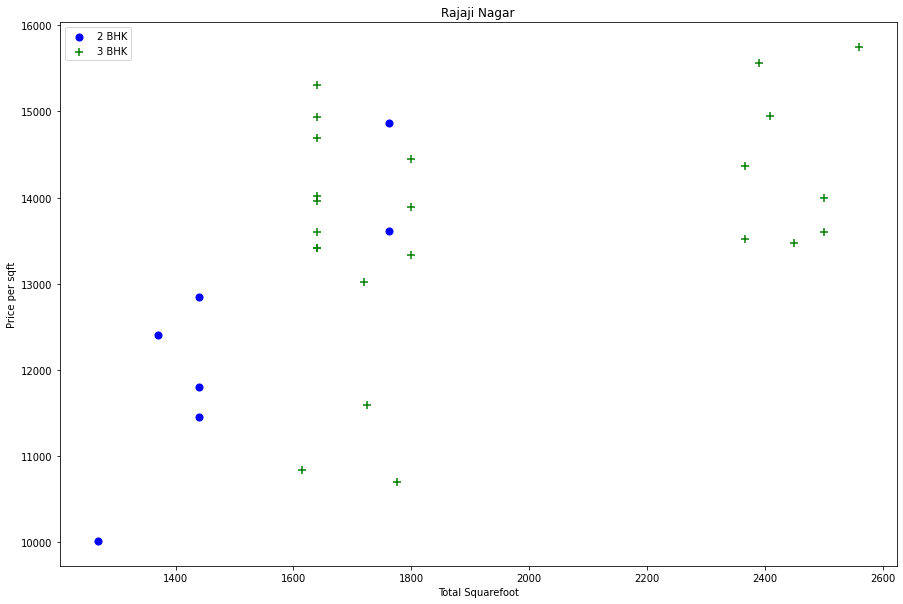

In [77]:
def scatter_plot(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams["figure.figsize"]=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft, color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price_per_sqft, marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel('Total Squarefoot')
    plt.ylabel('Price per sqft')
    plt.title(location)
    plt.legend()
    
scatter_plot(df4,'Rajaji Nagar')

# Remove BHk outliers

In [97]:
def remove_bhk_outlier(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

df5=remove_bhk_outlier(df4)
df5.shape

(4059, 7)

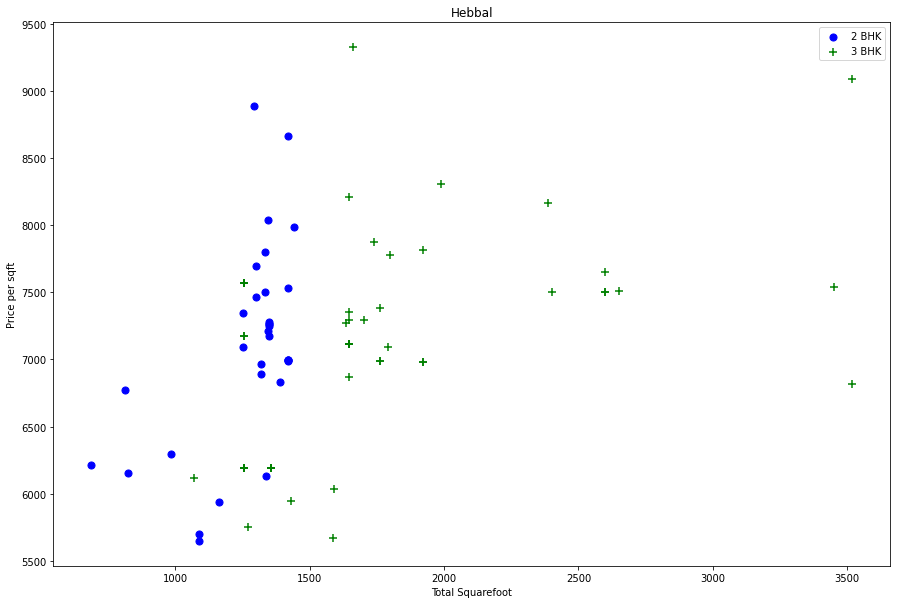

In [99]:
scatter_plot(df4,'Hebbal')

Text(0, 0.5, 'Count')

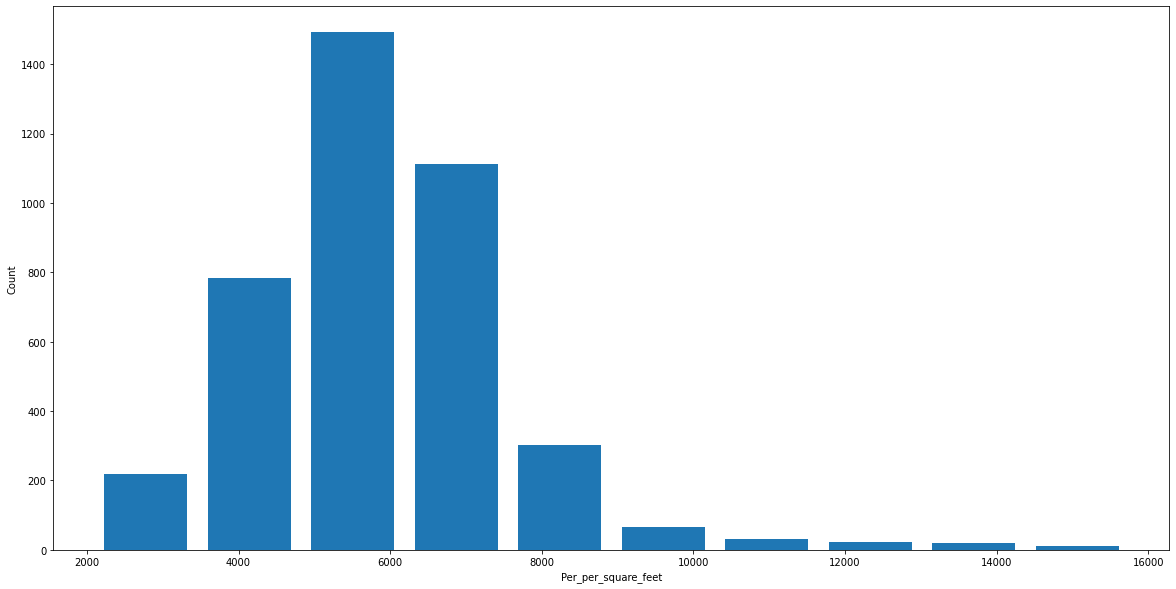

In [101]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df5.price_per_sqft,rwidth=0.8)
plt.xlabel("Per_per_square_feet")
plt.ylabel("Count")

In [102]:
df5.bath.unique()

array([4., 3., 2., 5., 1., 6., 7., 9.])

In [106]:
 df5[df5.bath>6]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
2984,Old Madras Road,5 BHK,4500.0,7.0,294.0,5,6533.333333
3003,Old Madras Road,5 BHK,5020.0,7.0,287.0,5,5717.131474
4648,other,11 BHK,5000.0,9.0,360.0,11,7200.000000
4657,other,9 BHK,5000.0,9.0,210.0,9,4200.000000
4866,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


Text(0, 0.5, 'Count')

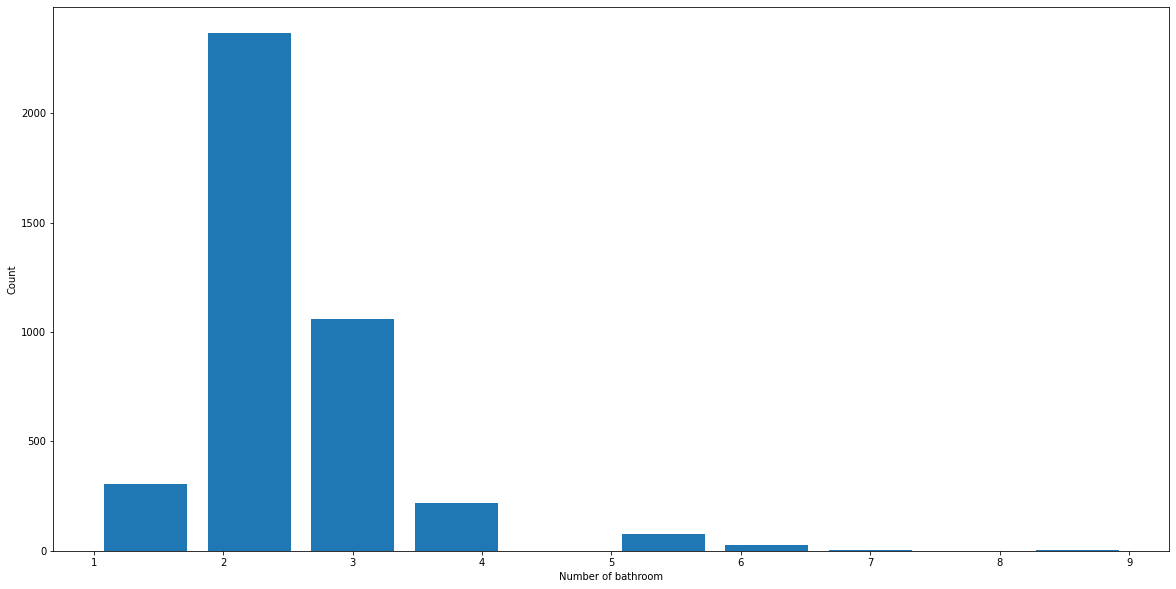

In [107]:
plt.hist(df5.bath,rwidth=0.8)
plt.xlabel("Number of bathroom")
plt.ylabel("Count")

In [109]:
df5[df5.bath>df5.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
3791,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
4866,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [110]:
df6=df5[df5.bath<df5.bhk+2]

In [112]:
df6.shape

(4017, 7)

In [113]:
df7=df6.drop(['size','price_per_sqft'],axis='columns')
df7.head()

,location,total_sqft,bath,price,bhk
0,1st Phase JP Nagar,2825.0,4.0,250.0,4
1,1st Phase JP Nagar,1875.0,3.0,167.0,3
2,1st Phase JP Nagar,1394.0,2.0,100.0,2
3,1st Phase JP Nagar,1077.0,2.0,93.0,2
4,1st Phase JP Nagar,1590.0,3.0,131.0,3


# Create Dummy Varibles

In [117]:
dummies=pd.get_dummies(df7.location)
dummies.head()

,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,...,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
df8=pd.concat([df7,dummies.drop('other',axis='columns')],axis='columns')
df8.head()

,location,total_sqft,bath,price,bhk,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,1st Phase JP Nagar,2825.0,4.0,250.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Phase JP Nagar,1875.0,3.0,167.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Phase JP Nagar,1394.0,2.0,100.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Phase JP Nagar,1077.0,2.0,93.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Phase JP Nagar,1590.0,3.0,131.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
df9=df8.drop('location',axis='columns')
df9.head()

,total_sqft,bath,price,bhk,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,2825.0,4.0,250.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1875.0,3.0,167.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1394.0,2.0,100.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1077.0,2.0,93.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1590.0,3.0,131.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
X=df9.drop('price',axis='columns')
X.head()

,total_sqft,bath,bhk,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,2825.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1875.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1394.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1077.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1590.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
y=df9.price
y.head()

0    250.0
1    167.0
2    100.0
3     93.0
4    131.0
Name: price, dtype: float64

In [125]:
from sklearn.model_selection import train_test_split
X_train,X_testt,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [128]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
lr_model.score(X_testt,y_test)


0.9301369609990329

In [131]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2, random_state=0)

cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.92512913, 0.91542329, 0.92028682, 0.92429244, 0.90451466])

# Using Grid Search to Find Best model

In [145]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor


def find_best_model(X,y):
    algos={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalise':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        
        }
    }
    
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    
    for algo_name, config in algos.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=[False])
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model(X,y)

ValueError: Invalid parameter 'normalise' for estimator LinearRegression(). Valid parameters are: ['copy_X', 'fit_intercept', 'n_jobs', 'positive'].